## Python Analysis

In [14]:
# Import Pandas and convert file to Dataframe
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("K10_filings2.xlsx")
df.head()

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M)
0,Microsoft,2021,168088,61271,333779,191791,76737
1,Microsoft,2022,198270,72738,364840,198298,89009
2,Microsoft,2023,211915,72361,411002,204779,89052
3,Apple,2021,365817,94680,351002,287912,104038
4,Apple,2022,394328,99803,352755,302083,122151


In [15]:
# Checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Company                                   9 non-null      object
 1   Fiscal Year                               9 non-null      int64 
 2   Total Revenue ($M)                        9 non-null      int64 
 3   Net Income ($M)                           9 non-null      int64 
 4   Total Assets ($M)                         9 non-null      int64 
 5   Total Liabilities ($M)                    9 non-null      int64 
 6   Cash Flow from Operating Activities ($M)  9 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 632.0+ bytes


In [16]:
# Checking data types
df.dtypes

Company                                     object
Fiscal Year                                  int64
Total Revenue ($M)                           int64
Net Income ($M)                              int64
Total Assets ($M)                            int64
Total Liabilities ($M)                       int64
Cash Flow from Operating Activities ($M)     int64
dtype: object

In [17]:
#  calculating year-over-year changes for each financial metric
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue ($M)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income ($M)'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby(['Company'])['Cash Flow from Operating Activities ($M)'].pct_change() * 100
df.head(9)

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M),Revenue Growth (%),Net Income Growth (%),Cash Flow Growth (%)
0,Microsoft,2021,168088,61271,333779,191791,76737,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,89009,17.956071,18.715216,15.992285
2,Microsoft,2023,211915,72361,411002,204779,89052,6.882030,-0.518299,0.048310
3,Apple,2021,365817,94680,351002,287912,104038,NaN,NaN,NaN
4,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858,17.409985
5,Apple,2023,383934,96995,352583,290437,122151,-2.635877,-2.813543,0.000000
6,Tesla,2021,53823,5644,53297,28096,11496,NaN,NaN,NaN
7,Tesla,2022,81462,12556,62131,30548,14724,51.351653,122.466336,28.079332
8,Tesla,2023,96773,13106,82338,36440,16788,18.795267,4.380376,14.017930


In [18]:
# Calculating other aggregate metrics
df['Profit Margin'] = df['Net Income ($M)'] / df['Total Revenue ($M)']
df['Asset Turnover Ratio'] = df['Total Revenue ($M)'] / df['Total Assets ($M)']
df['Liabilities to Assets Ratio'] = df['Total Liabilities ($M)'] / df['Total Assets ($M)']
df['Operating Cash Flow Margin'] = df['Cash Flow from Operating Activities ($M)'] / df['Total Revenue ($M)']
df['Return on Assets'] = df['Net Income ($M)'] / df['Total Assets ($M)']
df.head(9)

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M),Revenue Growth (%),Net Income Growth (%),Cash Flow Growth (%),Profit Margin,Asset Turnover Ratio,Liabilities to Assets Ratio,Operating Cash Flow Margin,Return on Assets
0,Microsoft,2021,168088,61271,333779,191791,76737,NaN,NaN,NaN,0.364517,0.503591,0.574605,0.456529,0.183568
1,Microsoft,2022,198270,72738,364840,198298,89009,17.956071,18.715216,15.992285,0.366863,0.543444,0.543520,0.448928,0.199370
2,Microsoft,2023,211915,72361,411002,204779,89052,6.882030,-0.518299,0.048310,0.341462,0.515606,0.498243,0.420225,0.176060
3,Apple,2021,365817,94680,351002,287912,104038,NaN,NaN,NaN,0.258818,1.042208,0.820257,0.284399,0.269742
4,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858,17.409985,0.253096,1.117852,0.856354,0.309770,0.282924
5,Apple,2023,383934,96995,352583,290437,122151,-2.635877,-2.813543,0.000000,0.252635,1.088918,0.823741,0.318156,0.275098
6,Tesla,2021,53823,5644,53297,28096,11496,NaN,NaN,NaN,0.104862,1.009869,0.527159,0.213589,0.105897
7,Tesla,2022,81462,12556,62131,30548,14724,51.351653,122.466336,28.079332,0.154133,1.311133,0.491671,0.180747,0.202089
8,Tesla,2023,96773,13106,82338,36440,16788,18.795267,4.380376,14.017930,0.135430,1.175314,0.442566,0.173478,0.159173


In [19]:
df=df.fillna(0)
df.head(9)

,Company,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M),Revenue Growth (%),Net Income Growth (%),Cash Flow Growth (%),Profit Margin,Asset Turnover Ratio,Liabilities to Assets Ratio,Operating Cash Flow Margin,Return on Assets
0,Microsoft,2021,168088,61271,333779,191791,76737,0.000000,0.000000,0.000000,0.364517,0.503591,0.574605,0.456529,0.183568
1,Microsoft,2022,198270,72738,364840,198298,89009,17.956071,18.715216,15.992285,0.366863,0.543444,0.543520,0.448928,0.199370
2,Microsoft,2023,211915,72361,411002,204779,89052,6.882030,-0.518299,0.048310,0.341462,0.515606,0.498243,0.420225,0.176060
3,Apple,2021,365817,94680,351002,287912,104038,0.000000,0.000000,0.000000,0.258818,1.042208,0.820257,0.284399,0.269742
4,Apple,2022,394328,99803,352755,302083,122151,7.793788,5.410858,17.409985,0.253096,1.117852,0.856354,0.309770,0.282924
5,Apple,2023,383934,96995,352583,290437,122151,-2.635877,-2.813543,0.000000,0.252635,1.088918,0.823741,0.318156,0.275098
6,Tesla,2021,53823,5644,53297,28096,11496,0.000000,0.000000,0.000000,0.104862,1.009869,0.527159,0.213589,0.105897
7,Tesla,2022,81462,12556,62131,30548,14724,51.351653,122.466336,28.079332,0.154133,1.311133,0.491671,0.180747,0.202089
8,Tesla,2023,96773,13106,82338,36440,16788,18.795267,4.380376,14.017930,0.135430,1.175314,0.442566,0.173478,0.159173


### Visualizations of Key Metrics

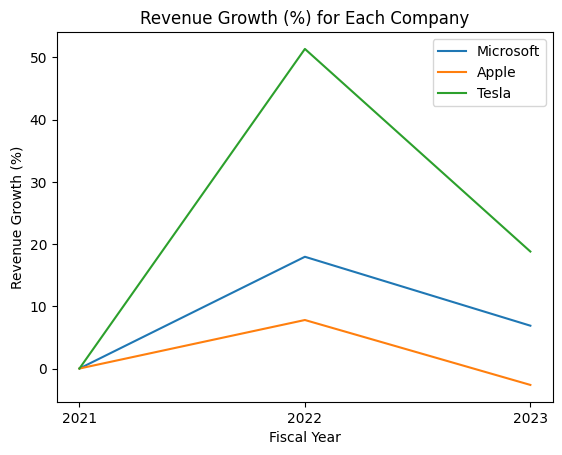

In [20]:
# Line Chart for Revenue Growth
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Loop through each company
for company in df['Company'].unique():
    # Filter data for the company
    data = df[df['Company'] == company]
    # Plot Year over Year Growth for the company
    ax.plot(data['Fiscal Year'].astype(str), data['Revenue Growth (%)'], label=company)

# Set labels and title
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Revenue Growth (%)')
ax.set_title('Revenue Growth (%) for Each Company')

# Add a legend
ax.legend()


# Save the figure
plt.show()

<ipython-input-21-dcf589915ac1>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Company', y='Return on Assets', hue='Fiscal Year', data=df, ci=None)


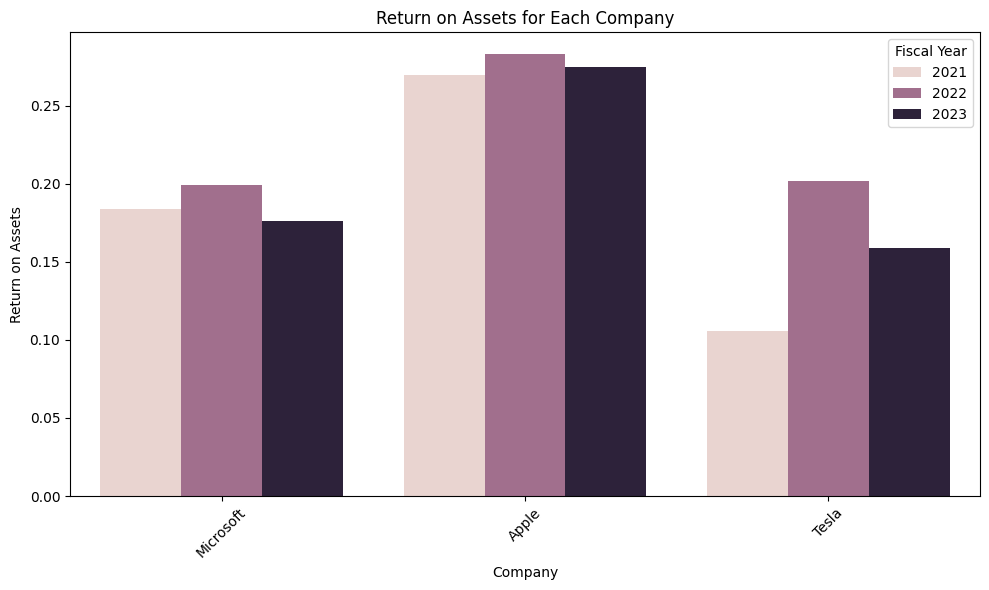

In [21]:
# Bar Chart for Return on Assets
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Company', y='Return on Assets', hue='Fiscal Year', data=df, ci=None)
plt.title('Return on Assets for Each Company')
plt.ylabel('Return on Assets')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

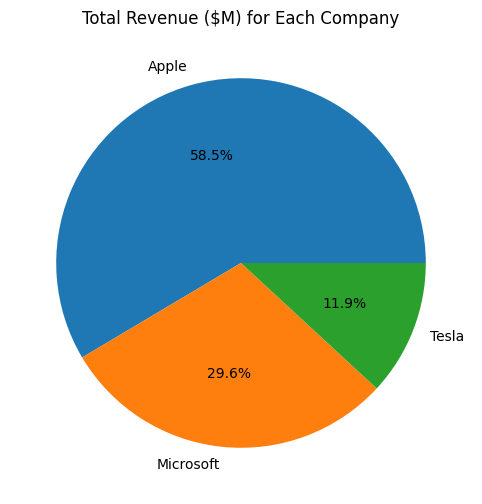

In [22]:
# Pie Chart for Total Revenue ($M)
# Group by 'Company' and sum 'Total Revenue ($M)'
revenue_sum = df.groupby('Company')['Total Revenue ($M)'].sum()

# Plotting
plt.figure(figsize=(10,6))
plt.pie(revenue_sum, labels=revenue_sum.index, autopct='%1.1f%%')
plt.title('Total Revenue ($M) for Each Company')
plt.show()
plt.close()

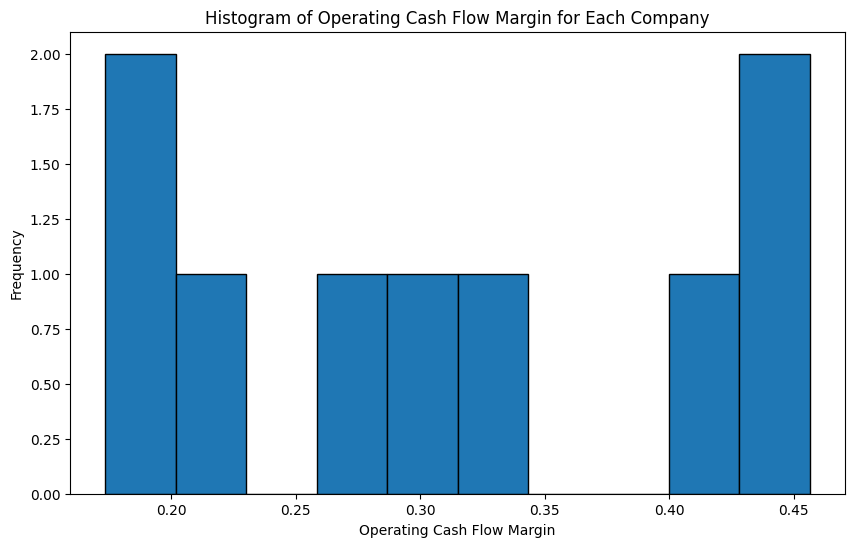

In [23]:
# Histogram for Operating Cash Flow Margin
plt.figure(figsize=(10,6))
plt.hist(df['Operating Cash Flow Margin'], bins=10, edgecolor='black')
plt.title('Histogram of Operating Cash Flow Margin for Each Company')
plt.xlabel('Operating Cash Flow Margin')
plt.ylabel('Frequency')
plt.show()
plt.close()

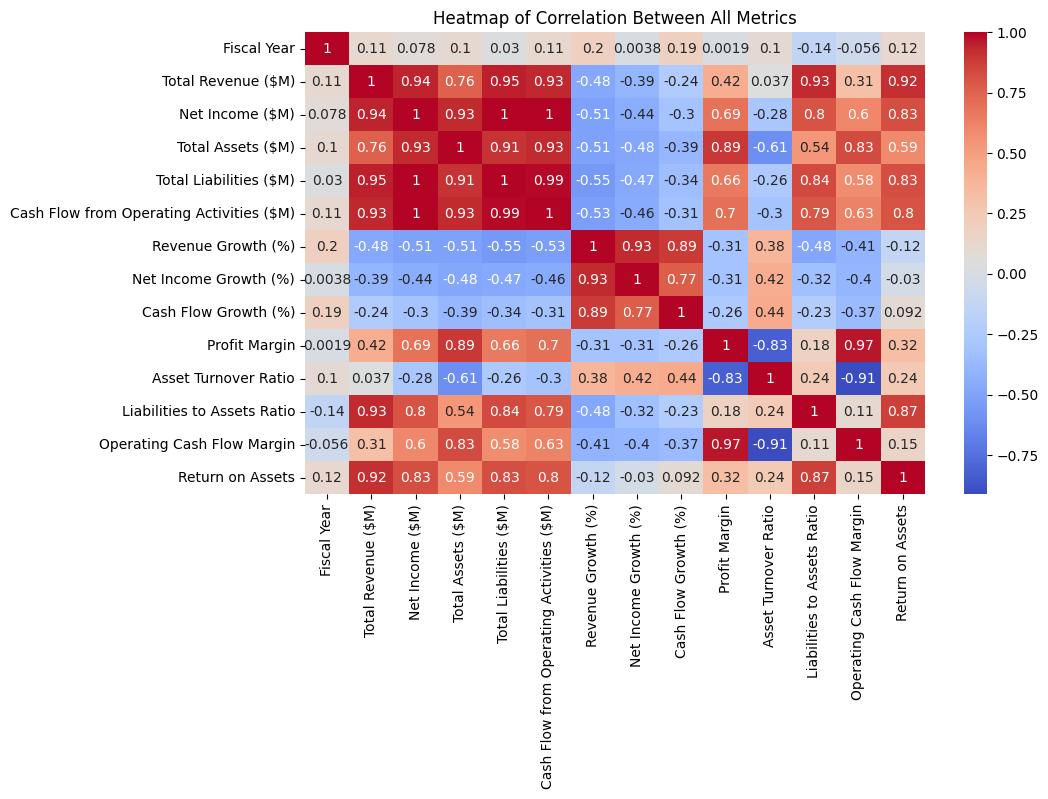

In [24]:
# Heatmap for correlation between all metrics
# Calculate correlation matrix
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Plotting
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between All Metrics')
plt.show()
plt.close()

In [25]:
# Statistical Analysis
df.describe()

,Fiscal Year,Total Revenue ($M),Net Income ($M),Total Assets ($M),Total Liabilities ($M),Cash Flow from Operating Activities ($M),Revenue Growth (%),Net Income Growth (%),Cash Flow Growth (%),Profit Margin,Asset Turnover Ratio,Liabilities to Assets Ratio,Operating Cash Flow Margin,Return on Assets
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2022.000000,217156.666667,58794.888889,262636.333333,174487.111111,71794.000000,11.126992,16.404549,8.394205,0.247980,0.923104,0.619791,0.311758,0.205991
std,0.866025,134014.610537,38509.352943,149194.647062,114880.429443,45618.598471,17.005288,40.284813,10.663315,0.099106,0.313747,0.164614,0.110824,0.059610
min,2021.000000,53823.000000,5644.000000,53297.000000,28096.000000,11496.000000,-2.635877,-2.813543,0.000000,0.104862,0.503591,0.442566,0.173478,0.105897
25%,2021.000000,96773.000000,13106.000000,82338.000000,36440.000000,16788.000000,0.000000,0.000000,0.000000,0.154133,0.543444,0.498243,0.213589,0.176060
50%,2022.000000,198270.000000,72361.000000,351002.000000,198298.000000,89009.000000,6.882030,0.000000,0.048310,0.253096,1.042208,0.543520,0.309770,0.199370
75%,2023.000000,365817.000000,94680.000000,352755.000000,287912.000000,104038.000000,17.956071,5.410858,15.992285,0.341462,1.117852,0.820257,0.420225,0.269742
max,2023.000000,394328.000000,99803.000000,411002.000000,302083.000000,122151.000000,51.351653,122.466336,28.079332,0.366863,1.311133,0.856354,0.456529,0.282924


In [26]:
# Saving the dataframe to excel spreadsheet
df.to_excel("K10_filings3.xlsx", index=False)

#### Summary of Analysis

From the analysis, Microsoft and Apple have demonstrated a strong financial performance and consistent revenue growth. Microsoft in 2022 showed a significant growth in their net income and in their operating cash flow but seemed to face a slight decline in 2023. Apple’s financial performance on the other hand has indicated robust growth, this can be seen in their operating cash flow and there they have also maintained a high efficiency in asset utilization. However, it will be good to note that Apple’s liabilities have increased relative to its assets, and this can be a point of concern.

Lastly, Tesla has also demonstrated a strong financial growth with substantial increase in their revenue and net income especially in 2022. Tesla has also been able to improve on its balance sheet by decreasing their liabilities-to-asset ratio and a strong cash flow growth. Even though Tesla had a slight decline in their profit margin and operating cash flow margin in 2023, they were still able to maintain a high efficiency in their asset utilization and profitability.

Overall, All the three companies have demonstrated a robust financial health and a strong growth trajectory.
